In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [2]:
files = ['resnet_50_from_scratch.pkl', 'resnet_101_finetuned.pkl', 'mnasnet1_0_state_centerloss.pkl', 
         'wide_rn_state_centerloss.pkl', 'shuffle_state_centerloss.pkl', 'resnet_50_state_centerloss.pkl']
names = ['ResNet-50 с нуля', 'ResNet-101 дообученная', 'MnasNet', 'WRN50', 'ShuffleNet', 
         'ResNet-50 дообученная']
# files = [
#     'resnet_50_state_centerloss.pkl', 'state_centerloss.pkl']
# names = [
#          'old Train', 'new Train', 'old Test', 'new Test']
states = []
for file in files:
    with open(file, 'rb') as f:
        states.append(pickle.load(f))

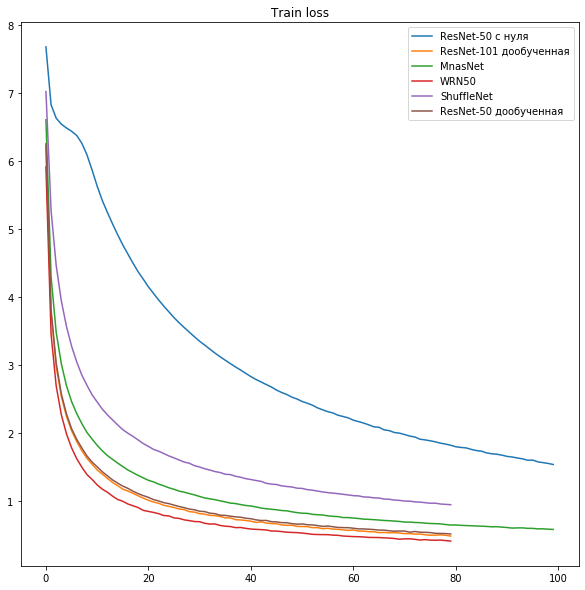

In [69]:
plt.figure(figsize=(10,10))
for state in states:
    train_loss = state['loss']
    plt.plot(np.arange(len(train_loss)), train_loss)
plt.title("Train loss")
plt.legend(names);

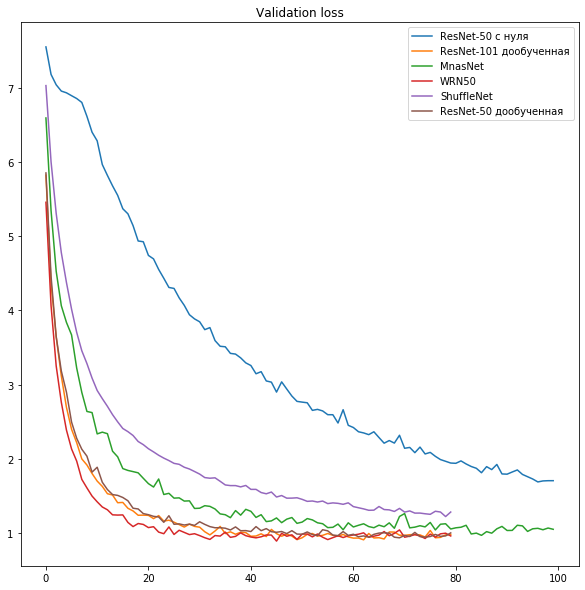

In [70]:
plt.figure(figsize=(10,10))
for state in states:
    val_loss = state['val_losses']
    plt.plot(np.arange(len(val_loss)), val_loss)
plt.title("Validation loss")
plt.legend(names);

In [11]:
plt.figure(figsize=(10,10))
xs, ys = [], []
fig = go.Figure()

for state, name in zip(states, names):
    val_loss = state['accuracy']
#     plt.plot(np.arange(len(val_loss)), val_loss)
    fig.add_trace(go.Scatter(x=np.arange(len(val_loss[:80])), y=val_loss[:80],
                    name=name))
    
# plt.title("Accuracy")
# plt.legend(names);

fig.update_layout(
    legend=dict(
        x=0.6,
        y=0.1
    ),
    width=800,
    height=600,
    xaxis_title="Номер эпохи",
    yaxis_title="Точность",
)
fig.show()

<Figure size 720x720 with 0 Axes>